In [1]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import PIL
import itertools as it
import urllib, io
import log
import math

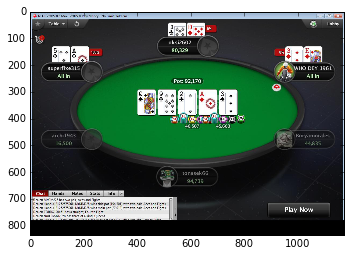

In [97]:
# f = io.BytesIO(urllib.urlopen('http://10.1.1.66:9000/windows/461550').read())
f = open('tables/004.jpeg')
img = Image.open(f)

plt.imshow(img)

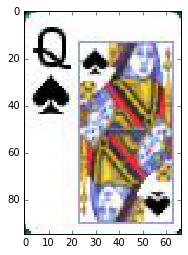

In [185]:
(table_width, table_height) = img.size
(board_offset_x, board_offset_y) = (400, 293)
card_width = 67
card_height = 95

board = img.crop((
    board_offset_x, 
    board_offset_y, 
    board_offset_x + card_width,
    board_offset_y + card_height
))

plt.imshow(board, interpolation='none')

In [197]:
def card(canvas, idx):
    card_width = 0.0572
    card_height = 0.1138
    card_padding = 0.008

def rank(canvas):
    rank_width = 0.018
    rank_height = 0.027

def suit(canvas):
    suit_width = 0.018
    suit_height = 0.027

def board(canvas):
    board_offset_x = 0.3509
    board_offset_y = 0.3413

(table_width, table_height) = img.size
(board_offset_x, board_offset_y) = (0.3413, 0.3509)
card_width = 0.0572
card_height = 0.1138
card_padding = 0.008

i = 0
card_box = (
    int(float(table_width) * (board_offset_x + (card_width+card_padding)*i)),
    int(float(table_height) * board_offset_y),
    int(float(table_width) * (board_offset_x + card_padding*i + card_width*(i+1))),
    int(float(table_height) * (board_offset_y + card_height))
)

(rank_offset_x, rank_offset_y) = (0.001, 0.0055)
rank_width = 0.018
rank_height = 0.027

rank_box = (
    int(float(table_width) * (board_offset_x + (card_width+card_padding)*i + rank_offset_x)),
    int(float(table_height) * (board_offset_y + rank_offset_y)),
    int(float(table_width) * (board_offset_x + (card_width+card_padding)*i + rank_offset_x + rank_width)),
    int(float(table_height) * (board_offset_y + rank_offset_y + rank_height))
)

(suit_offset_x, suit_offset_y) = (0.0005, 0.031)
suit_width = 0.018
suit_height = 0.027

suit_box = (
    int(float(table_width) * (board_offset_x + (card_width+card_padding)*i + suit_offset_x)),
    int(float(table_height) * (board_offset_y + suit_offset_y)),
    int(float(table_width) * (board_offset_x + (card_width+card_padding)*i + suit_offset_x + suit_width)),
    int(float(table_height) * (board_offset_y + suit_offset_y + suit_height))
)

board = img.crop(suit_box)

plt.imshow(board, interpolation='none')

IndentationError: expected an indented block (<ipython-input-197-0af5af53eef5>, line 3)

In [229]:
def draw_images(images, labels, num_cols, num_rows=None, cmap=None):
    if num_rows is None:
        num_rows = len(images) / num_cols
    width, height = 10 * num_cols, 5 * num_rows
    fig = plt.figure(figsize=(width, height))
    
    items = list(enumerate(zip(images, labels)))
    items = items[:int(num_rows*num_cols)]
    
    for i, (image, label) in items:
        data = np.asarray(image)

        ax = fig.add_subplot(num_rows, num_cols, i+1)

        ax.imshow(data, cmap=cmap)
        ax.set_xticklabels([])
        ax.set_yticklabels([])
        ax.text(0, 0, label, bbox={'facecolor':'white', 'pad':5}, fontdict={'size':14, 'weight':'bold'})

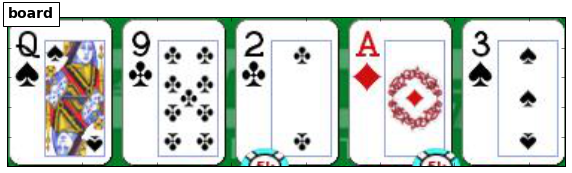

In [230]:
def crop(canvas, offset, size):
    (width, height) = canvas.size
    (offset_x, offset_y) = offset
    (w, h) = size
    box = (
        int(width * offset_x),
        int(height * offset_y),
        int(width * (offset_x + w)),
        int(height * (offset_y + h))
    )
    return img.crop(box)

def board(table):
    offset = (0.34, 0.348)
    size = (0.32, 0.12)
    return crop(table, offset, size)
#     board_box = crop(table, offset, size)
#     card_boxes = [card(board_box, idx) for ids in range(0, 5)]
#     ranks = [rank(card_box) for card_box in card_boxes]
#     suits = [suit(card_box) for card_box in card_boxes]
#     return (ranks, suits)

def board_cards_images(table):
    offset = (0.34, 0.348)
    size = (0.32, 0.12)
    board_image = crop(table, offset, size)
    return 

b = board(img)

draw_images([b], ["board"], 1)

# (board_ranks, board_suits) = board(table)
# (hand_ranks, hand_suits) = hand(table)

In [153]:
suit_box

(401, 299, 422, 320)

In [195]:
tbl = Table(img)

In [196]:
tbl